# Introduction

In this notebook we'll create pretty, random-looking large graphs that will be used as a background in the ARRA app.

Note also we can get some real world data from SNAP's Large Network Dataset Collection at https://snap.stanford.edu/data/index.html

In [1]:
%pylab inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

Populating the interactive namespace from numpy and matplotlib


# Barabasi-Albert

One natural option for simulating a random social network is to use the Barabasi-Albert preferential attachment model, in which a graph of `n` nodes is grown by attaching new nodes each with `m` edges that are preferentially attached to existing nodes with high degree.

Start by choosing the minimum and maximum size of the nodes, size of the pic, and generating a B-A model with a lot of nodes and with `m` that is not too big:

In [2]:
smax = 1000
smin = 10
fig_width = 16
fig_height = 16
G = nx.barabasi_albert_graph(n = 700, m = 2)

For visual purposes, let's set the size of the nodes to be proportional to their degrees:

In [3]:
d = nx.degree(G)
dmax = max(d.values())
dmin = min(d.values())
alpha = float(smax - smin) / float(dmax - dmin)
beta = float(dmax * smin - dmin * smax) / float(dmax - dmin)
sizes = [alpha * v + beta for v in d.values()]

Finally, let's plot the graph with somewhat transparent nodes and edges, and using the force-directed (i.e. 'spring') layout:

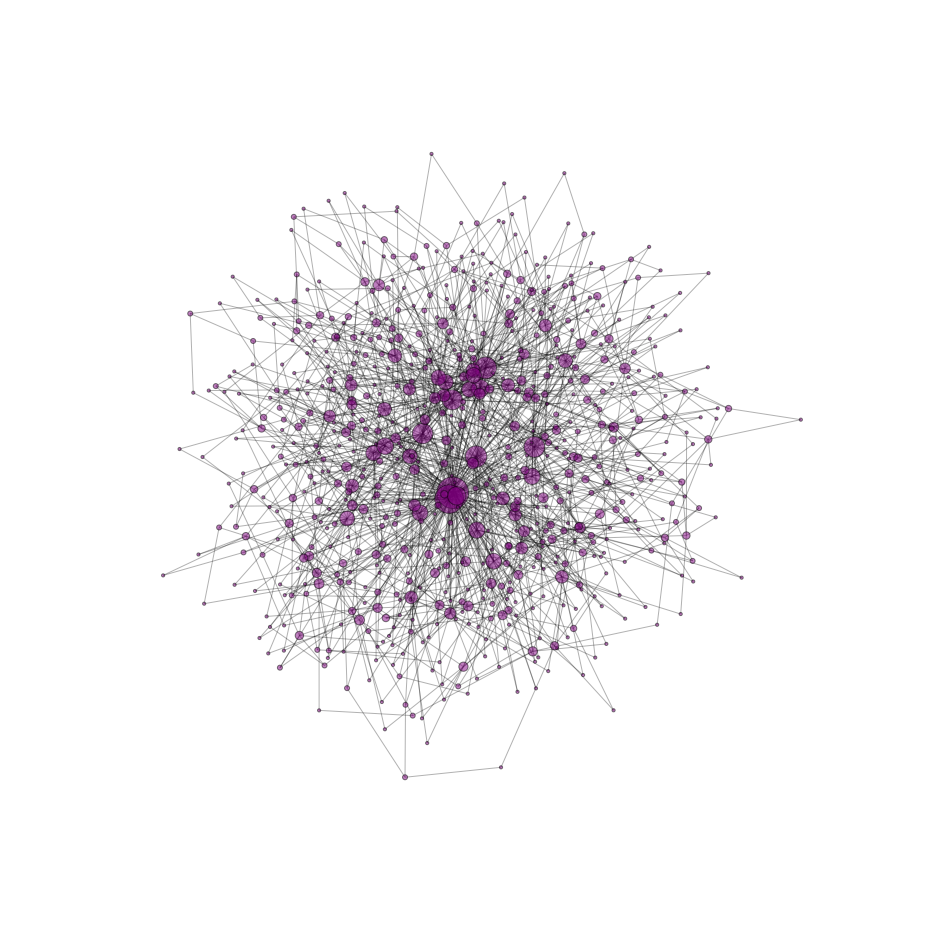

In [6]:
fig = plt.figure(figsize = (fig_width, fig_height))
plt.axis('off')
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, nodelist = d.keys(), node_size = sizes, pos = pos, alpha = 0.5, node_color = 'purple')
nx.draw_networkx_edges(G, pos, alpha = 0.3);

Export by trimming the white space around the graph as much as possible:

In [84]:
fig.savefig('ba.png', transparent = True, dpi = 150, bbox_inches = 'tight', pad_inches = 0)

# Ego subgraph of Barabasi-Albert

However, we may want to see some more of the 'lonely' nodes that stick out with just one edge. Since in the above example `m = 2`, we can't see that, and `m = 1` just doesn't look good.

We could however grab a subgraph of Barabasi-Albert, and a simple choice is to choose an ego graph of some radius `r` (i.e. a node plus all the other nodes connected to it with distance `<= r`), and a natural choice is to choose the node with the highest degree, since it will come with the highest number of nodes.

As before, start by generating a Barabas-Albert graph with a lot of nodes and low `m`:

In [10]:
numNodes = 1000
mBA = 2
G = nx.generators.barabasi_albert_graph(numNodes, mBA)

Now find the highest degree node and extract its ego graph:

In [8]:
rad = 2
dG = G.degree()
(largest_hub, degree) = sorted(dG.items(), key = itemgetter(1))[-1]
hub_ego = nx.ego_graph(G, largest_hub, radius = rad)

As before, make the node sizes proportional to their degree in the ego graph:

In [11]:
smax = 3000
smin = 10
d = nx.degree(hub_ego)
dmax = max(d.values())
dmin = min(d.values())
alpha = float(smax - smin) / float(dmax - dmin)
beta = float(dmax * smin - dmin * smax) / float(dmax - dmin)
sizes = [alpha * v + beta for v in d.values()]

As before, show the graph with semi-transparent nodes and edges:

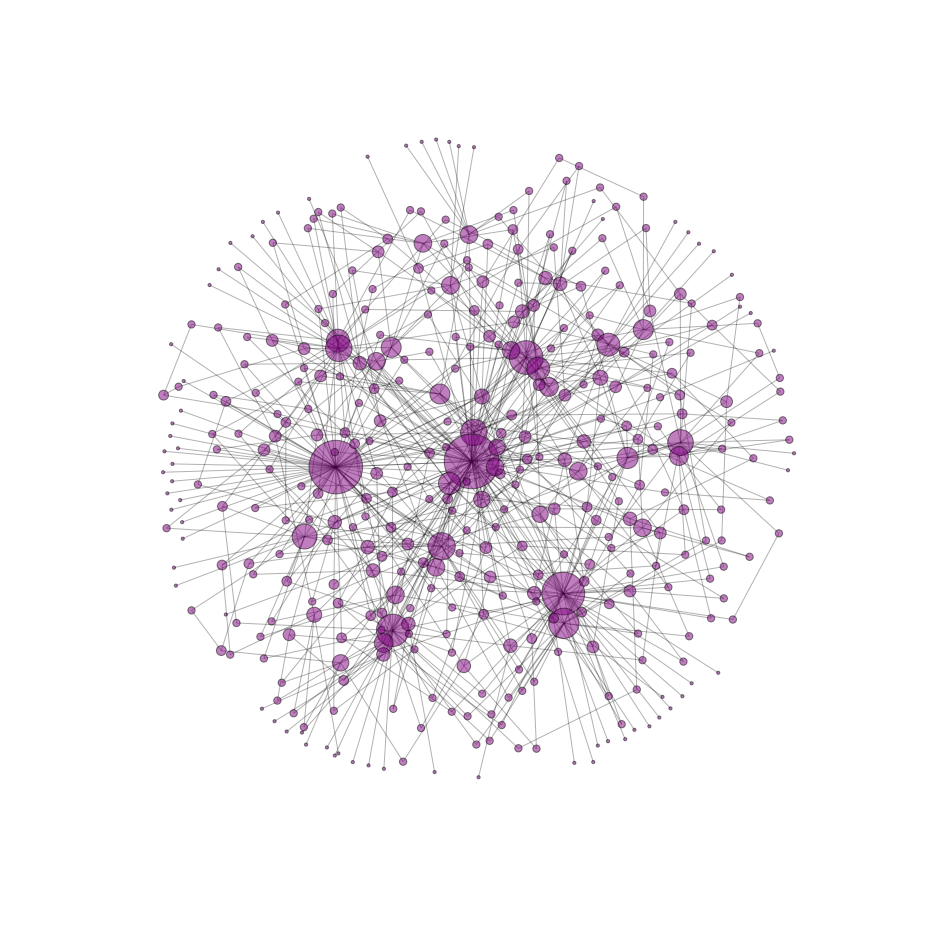

In [13]:
fig = plt.figure(figsize = (fig_width, fig_height))
plt.axis('off')
pos = nx.spring_layout(hub_ego)
nx.draw_networkx_nodes(hub_ego, nodelist = d.keys(), node_size = sizes,
                       pos = pos, alpha = 0.5, node_color = 'purple')
nx.draw_networkx_edges(hub_ego, pos, alpha = 0.3);

Note however that even though we got the degree = 1 nodes, they tend to be spread out too circularly, which has to do with the force direted layout. Couple of ways to get a more disordered graph is to 
* Lower the number iterations that enforces the spring force layout from the default 50 to, say, 10
* Enforce the optimal distance between nodes to be some value, so they are less circular

For example, we could do:

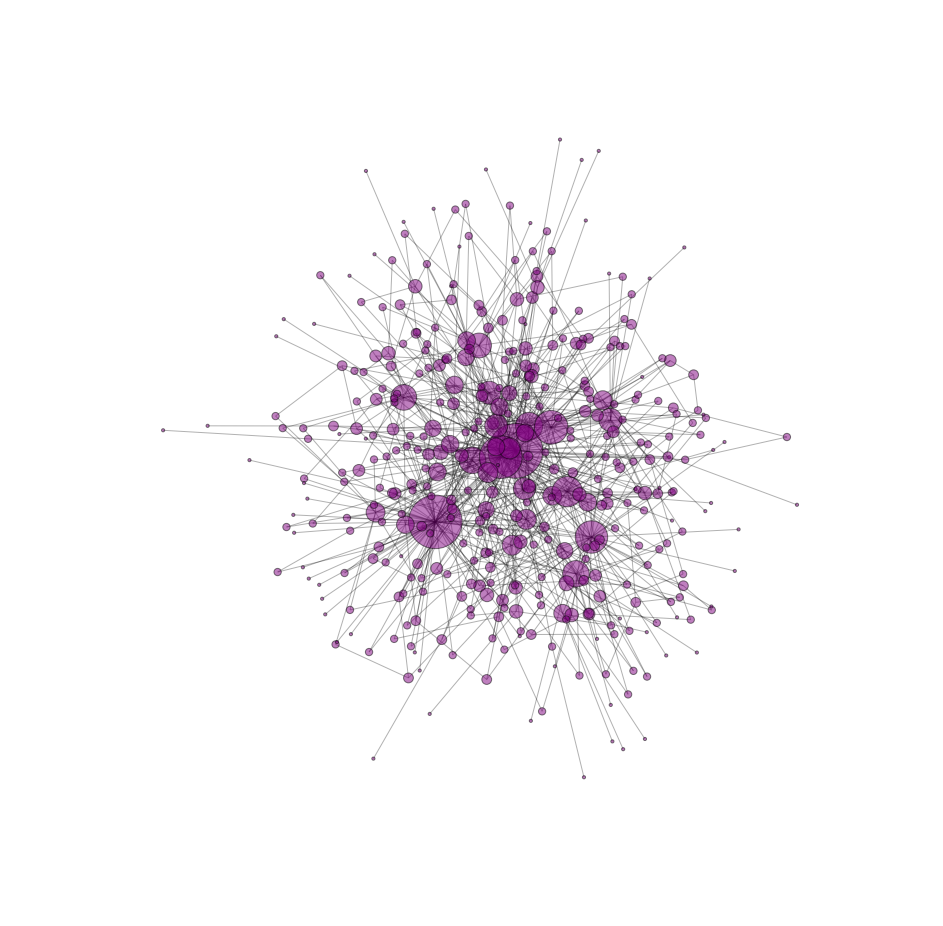

In [21]:
fig = plt.figure(figsize = (fig_width, fig_height))
plt.axis('off')
pos = nx.spring_layout(hub_ego, k =0.04, iterations = 10)
nx.draw_networkx_nodes(hub_ego, nodelist = d.keys(), node_size = sizes,
                       pos = pos, alpha = 0.5, node_color = 'purple')
nx.draw_networkx_edges(hub_ego, pos, alpha = 0.3);

Export:

In [ ]:
fig.savefig('ba-ego.png', transparent = True, dpi = 150, bbox_inches = 'tight', pad_inches = 0)